In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [19]:
df = pd.read_csv('Train.csv')
data = df.values
X = data[:,0:data.shape[1]-1]
Y = data[:,data.shape[1]-1:]

In [20]:
def hypothesis(x,theta):
    m = x.shape[0]
    ans = 0.0
    for i in range(m):
        ans += x[i]*theta[i+1]
    ans = ans+theta[0]
    return ans

def error(X,Y,theta):
    n = X.shape[0]
    err = 0
    for i in range(n):
        hyp = hypothesis(X[i],theta)
        err += (hyp-Y[i])**2
    return err

def gradient(X,Y,theta):
    grad = np.zeros((X.shape[1]+1,))
    n = X.shape[0]
    m = X.shape[1]+1
    
    for j in range(1,m):
        for i in range(n):
            hyp = hypothesis(X[i],theta)
            grad[j]=grad[j] + (hyp-Y[i])*X[i][j-1]
    
    for i in range(n):
        hyp = hypothesis(X[i],theta)
        grad[0]=grad[0] + (hyp-Y[i])
    return grad

def grad_algo(X,Y,learning_rate= 0.00005):
    theta = np.zeros((X.shape[1]+1,))
    max_itr =100
    itr=1
    m = X.shape[1]+1
    err_list =[]
    while(itr<max_itr):
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)
        err_list.append(e)
        for i in range(m):
            theta[i]= theta[i]- learning_rate*grad[i]
        itr = itr+1
    return theta,err_list

[ 4.97738284 29.67077789 92.64237262  8.26518179 44.75305329  2.51249142]


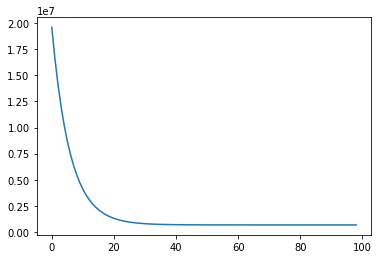

In [21]:
final_theta,err_list = grad_algo(X,Y)
print(final_theta)
plt.plot(err_list)

In [22]:
testX = pd.read_csv('Test.csv')
testX = testX.values
print(testX.shape)
testY = []

(400, 5)


In [23]:
for i in range(testX.shape[0]):
    testY.append(hypothesis(testX[i],final_theta))

testY = np.array(testY)
print(testY.shape)

(400,)


In [24]:
print(testY[0])

114.56325614492746


ValueError: x and y must be the same size

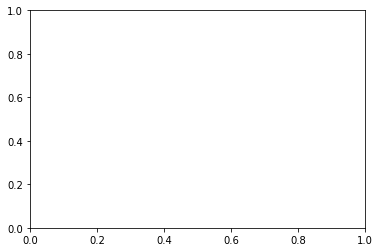

In [25]:
plt.scatter(X[0],Y)
plt.scatter(testX[0],testY,color='red')